<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Deep%20Learning/Keras_iris_Modeling_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
import tensorflow
tensorflow.__version__

'2.13.0'

In [7]:
import keras
keras.__version__

'2.13.1'

# Data Processing

In [9]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris['species']

X.shape, y.shape

((150, 4), (150,))

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
LBE_y = encoder.fit_transform(y)

In [12]:
LBE_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from tensorflow.keras.utils import to_categorical

OHE_y = to_categorical(LBE_y)
OHE_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, OHE_y,
                                                 test_size = 0.3,
                                                 random_state = 2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

# Keras Modeling

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [17]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,)))
Model_iris.add(layers.Dense(8, activation = 'relu'))
Model_iris.add(layers.Dense(3, activation = 'softmax'))

In [19]:
Model_iris.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


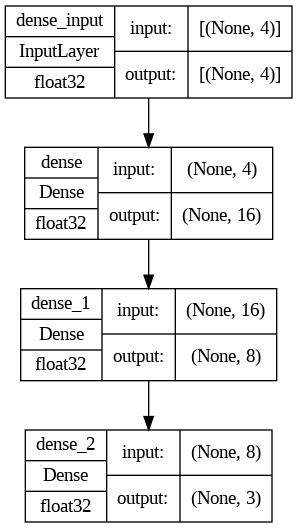

In [20]:
from tensorflow.keras import utils

utils.plot_model(Model_iris,
                 show_shapes = True,
                 show_dtype = True)

In [22]:
Model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [23]:
History_iris = Model_iris.fit(X_train, y_train,
                              epochs = 250,
                              batch_size = 7,
                              validation_data = (X_test, y_test))

Epoch 1/250
15/15 [==============================] - 1s 21ms/step - loss: 1.4645 - accuracy: 0.3429 - val_loss: 1.3364 - val_accuracy: 0.3111
Epoch 2/250
15/15 [==============================] - 0s 4ms/step - loss: 1.2331 - accuracy: 0.3429 - val_loss: 1.1830 - val_accuracy: 0.3111
Epoch 3/250
15/15 [==============================] - 0s 4ms/step - loss: 1.1095 - accuracy: 0.3429 - val_loss: 1.1032 - val_accuracy: 0.3111
Epoch 4/250
15/15 [==============================] - 0s 4ms/step - loss: 1.0700 - accuracy: 0.2952 - val_loss: 1.0772 - val_accuracy: 0.3111
Epoch 5/250
15/15 [==============================] - 0s 5ms/step - loss: 1.0485 - accuracy: 0.3333 - val_loss: 1.0625 - val_accuracy: 0.3111
Epoch 6/250
15/15 [==============================] - 0s 5ms/step - loss: 1.0335 - accuracy: 0.3238 - val_loss: 1.0482 - val_accuracy: 0.3111
Epoch 7/250
15/15 [==============================] - 0s 4ms/step - loss: 1.0179 - accuracy: 0.3619 - val_loss: 1.0310 - val_accuracy: 0.3333
Epoch 8/250


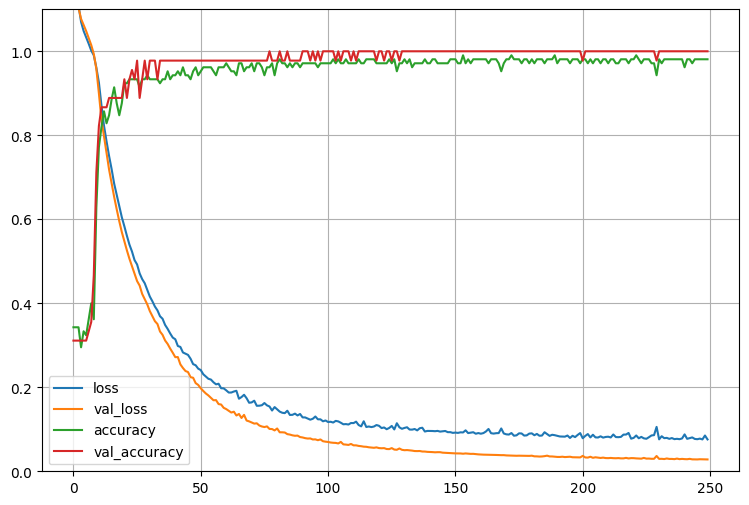

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6))
plt.ylim(0, 1.1)
plt.plot(History_iris.history['loss'])
plt.plot(History_iris.history['val_loss'])
plt.plot(History_iris.history['accuracy'])
plt.plot(History_iris.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [26]:
loss, accuracy = Model_iris.evaluate(X_test, y_test, verbose = 0)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.02818
Accuracy = 1.00000


In [27]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)

Model_iris.predict(X_test, verbose = 0)

array([[0.99735, 0.00265, 0.     ],
       [0.99091, 0.00909, 0.     ],
       [0.03267, 0.96732, 0.00001],
       [0.     , 0.00275, 0.99725],
       [0.99888, 0.00112, 0.     ],
       [0.00477, 0.99508, 0.00015],
       [0.     , 0.00617, 0.99383],
       [0.99956, 0.00044, 0.     ],
       [0.     , 0.00365, 0.99635],
       [0.99691, 0.00309, 0.     ],
       [0.00011, 0.59456, 0.40533],
       [0.     , 0.00398, 0.99602],
       [0.00034, 0.96789, 0.03178],
       [0.9998 , 0.0002 , 0.     ],
       [0.99881, 0.00119, 0.     ],
       [0.00068, 0.97748, 0.02184],
       [0.00019, 0.92195, 0.07786],
       [0.99799, 0.00201, 0.     ],
       [0.00055, 0.99842, 0.00103],
       [0.99929, 0.00071, 0.     ],
       [0.99716, 0.00284, 0.     ],
       [0.99736, 0.00264, 0.     ],
       [0.     , 0.00299, 0.99701],
       [0.9982 , 0.0018 , 0.     ],
       [0.     , 0.01971, 0.98029],
       [0.     , 0.01048, 0.98952],
       [0.99907, 0.00093, 0.     ],
       [0.00019, 0.99391, 0.

In [28]:
y_hat = np.argmax(Model_iris.predict(X_test, verbose = 0), axis = 1)
y_hat

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [29]:
y = np.argmax(y_test, axis = 1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 14]])

In [31]:
print(classification_report(y,y_hat,
                            target_names = ['setosa','versicolor','virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Model Save & Load

## File System

In [32]:
!ls -l

total 32
-rw-r--r-- 1 root root 27143 Oct 10 04:09 model.png
drwxr-xr-x 1 root root  4096 Oct  6 13:25 sample_data


In [33]:
Model_iris.save('/content/Model_iris.h5')

!ls -l

total 68
-rw-r--r-- 1 root root 34240 Oct 10 04:16 Model_iris.h5
-rw-r--r-- 1 root root 27143 Oct 10 04:09 model.png
drwxr-xr-x 1 root root  4096 Oct  6 13:25 sample_data


In [34]:
from google.colab import files
files.download('/content/Model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
from tensorflow.keras.models import load_model

Model_local = load_model('/content/Model_iris.h5')

In [36]:
np.argmax(Model_local.predict(X_test, verbose = 0), axis = 1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

## Google Drive

In [57]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [58]:
!mkdir -p '/content/drive/My Drive/Colab Notebooks/models'

In [59]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 0


In [60]:
Model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [61]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34240 Oct 10 04:27 001_Model_iris.h5


In [64]:
from tensorflow.keras.models import load_model
Model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_Model_iris.h5')

In [65]:
np.argmax(Model_google.predict(X_test,verbose=0), axis=1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])